<a href="https://colab.research.google.com/github/adnanagbaria/MLcourse/blob/main/Lec6_classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification: part 1
Agenda:
* Classification Tasks in ML
* Logistic Regression
* K-Nearest Neighbors (K-NN)
* Support Vector Machines (SVM)
* Kernel SVM
* Bayes Theorem
* Naive Bayes

# Classification Tasks in Machine Learning
Classification is a type of supervised learning where the goal is to assign input data to discrete categories or labels.

To build models that predict class membership for new, unseen data based on patterns learned from labeled training data.

**Common Examples:**
* Email Spam Detection → Spam / Not Spam
* Medical Diagnosis → Disease / No Disease
* Credit Approval → Approved / Rejected
* Image Recognition → Dog / Cat / Car / Tree
* Customer Churn Prediction → Will Leave / Will Stay

**Key Characteristics:**
* Output is categorical (unlike regression where output is numeric)
* Can be:
  * Binary: Two classes (e.g., 0 or 1)
  * Multiclass: More than two classes (e.g., types of fruit)
  * Multilabel: Assign multiple classes at once (e.g., tags in image)

**Algorithms Often Used for Classification:**
* Logistic Regression
* K-Nearest Neighbors (K-NN)
* Support Vector Machines (SVM)
* Decision Trees / Random Forest
* Naive Bayes
* Neural Networks



# Logistic Regression
Logistic Regression is a classification algorithm used to predict the probability that an input belongs to a certain class — especially for binary classification problems (e.g., 0 or 1, yes or no, pass or fail).

Instead of predicting a numeric value (as in linear regression), logistic regression predicts a probability using the sigmoid function.

$\hat{y} = \frac{1}{1-e^{-z}}$, where $z = b_0 + b_1x1 + ... +b_nx_n$

* Output $\hat{y} \in (0, 1)$ is interpreted as the probability of class 1.
* Decision rule: $\hat{y} \ge 0.5 =>$ Class 1, else Class 0

**Loss Function: Binary Cross-Entropy**

$Loss = - \frac{1}{n} \Sigma[y\log(\hat{y}) + (1-y)\log(1-\hat{y})]$

This penalizes wrong predictions more heavily as they get more confident and wrong.

In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Sample binary data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([0, 0, 0, 1, 1])

# Train model
model = LogisticRegression()
model.fit(X, y)

# Predict probability and class
print("Probabilities:", model.predict_proba([[3.5], [1.5]]))
print("Predictions:", model.predict([[4.5], [1.5]]))


Probabilities: [[0.5208689  0.4791311 ]
 [0.89822094 0.10177906]]
Predictions: [1 0]


In [3]:
# prompt: give another example of Logistic Regression

import numpy as np
# Example 2: Predicting whether a student passes an exam based on hours studied

# Sample data: Hours studied (X) and Pass (y)
X_exam = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y_exam = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # 0: Fail, 1: Pass

# Create and train a Logistic Regression model
model_exam = LogisticRegression()
model_exam.fit(X_exam, y_exam)

# Predict probabilities and classes for new data (e.g., student who studied 4.5 or 7.5 hours)
print("\nExam Probabilities:", model_exam.predict_proba([[4.5], [7.5]]))
print("Exam Predictions:", model_exam.predict([[4.5], [7.5]]))


Exam Probabilities: [[0.49822548 0.50177452]
 [0.02784271 0.97215729]]
Exam Predictions: [1 1]


# K-Nearest Neighbors (K-NN)
K-Nearest Neighbors is a non-parametric, instance-based learning algorithm used for both classification and regression. For classification, it assigns a label based on the majority vote among the K closest training examples in the feature space.

**How It Works (Classification):**
1. Choose a value for K (number of neighbors)
2. Measure the distance (e.g., Euclidean) between the test point and all training points.
3. Select the K nearest neighbors.
4. Assign the class that is most common among those neighbors.

Euclidean Distance: $d = \sqrt{\Sigma(x_i-x_j)^2}$

(Lec6: Slide 9)

**Example Use Case:**
* Predict whether a customer will buy a product based on age and income.
* If most of their "K" nearest peers did, predict "Yes".


K-NN Accuracy: 1.0
Prediction for a new customer (Age 33, Income 70000): Will Buy


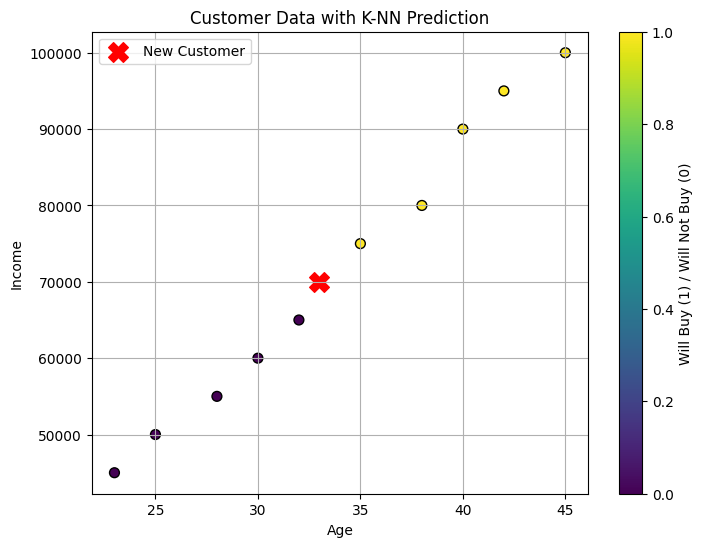

In [7]:
# prompt: give an example of K-NN

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Sample data (Age, Income) and Class (Will Buy: 1, Will Not Buy: 0)
X_customers = np.array([[25, 50000], [30, 60000], [35, 75000], [40, 90000], [45, 100000],
                      [28, 55000], [32, 65000], [38, 80000], [42, 95000], [23, 45000]])
y_customers = np.array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0]) # 0: Will Not Buy, 1: Will Buy

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_customers, y_customers, test_size=0.3, random_state=42)

# Create a K-NN classifier (e.g., with K=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print("\nK-NN Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Predict for a new customer (e.g., Age 33, Income 70000)
new_customer = np.array([[33, 70000]])
prediction = knn.predict(new_customer)
print("Prediction for a new customer (Age 33, Income 70000):", "Will Buy" if prediction[0] == 1 else "Will Not Buy")

# Optional: Visualize the data and the prediction boundary (simple 2D case)
plt.figure(figsize=(8, 6))
plt.scatter(X_customers[:, 0], X_customers[:, 1], c=y_customers, cmap='viridis', s=50, edgecolors='k')
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Customer Data with K-NN Prediction")
plt.colorbar(label="Will Buy (1) / Will Not Buy (0)")
plt.scatter(new_customer[:, 0], new_customer[:, 1], c='red', marker='X', s=200, label='New Customer')
plt.legend()
plt.grid(True)
plt.show()

**Advantages:**
* Simple, intuitive
* No training phase (lazy learner) - unsupervised learning
* Adapts naturally to complex boundaries

**Disadvantages:**
* Slow with large datasets
* Sensitive to irrelevant features or feature scaling
* Need to choose K carefully

# Support Vector Machines (SVM)
Support Vector Machines (SVMs) are powerful supervised learning models used for classification and regression, particularly effective in high-dimensional spaces.

For classification, SVMs aim to find the best separating hyperplane that maximizes the margin between different classes.

**Core Concepts:**
* Hyperplane: A decision boundary that separates classes. In 2D, it’s a line; in 3D, it’s a plane.
* Support Vectors: Data points closest to the hyperplane. These are the critical elements that define the position of the hyperplane.
* Margin: The distance between the hyperplane and the nearest support vectors. SVMs maximize this margin to improve generalization.

**Hard-Margin SVM (ideal case):**
Only works when the data is linearly separable.

**Soft-Margin SVM (real-world use):**
Allows some misclassifications to avoid overfitting.

**Objective Function:**
$\min_{W,b} \frac{1}{2}||W||^2 + C \Sigma \psi_i$

Subject to: $y_i(W^Tx_i+b) \ge 1-\psi_i, \psi_i \ge 0$
* $W$: weight vector
* $b$: bias
* $C$: regularization parameter (trade-off between margin size and misclassification)

(Lec6: Slides 14-21)


SVM Predictions for new points [2, 2], [4, 4], [1, 3]: [0 1 0]


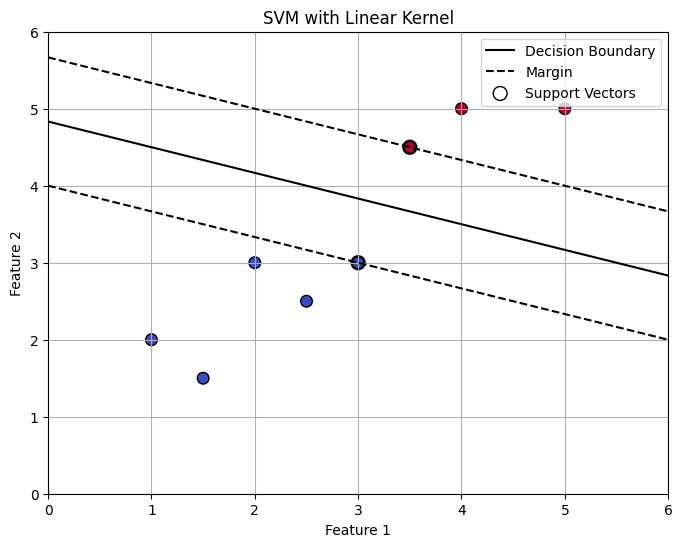

In [8]:
# prompt: give an example of Support Vector Machines (SVM)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

# Sample data: Feature 1, Feature 2, Class (0 or 1)
X_svm = np.array([[1, 2], [2, 3], [3, 3], [4, 5], [5, 5],
                  [1.5, 1.5], [2.5, 2.5], [3.5, 4.5]])
y_svm = np.array([0, 0, 0, 1, 1, 0, 0, 1])

# Create an SVM classifier
# kernel='linear' specifies a linear kernel (for linearly separable data or a linear boundary)
# C is the regularization parameter. A smaller C allows more misclassifications but a wider margin.
clf = svm.SVC(kernel='linear', C=1.0)

# Train the SVM model
clf.fit(X_svm, y_svm)

# Predict on new data points
new_points_svm = np.array([[2, 2], [4, 4], [1, 3]])
predictions_svm = clf.predict(new_points_svm)

print("\nSVM Predictions for new points [2, 2], [4, 4], [1, 3]:", predictions_svm)

# Optional: Visualize the data and the separating hyperplane (for 2D data)
# This part requires creating a meshgrid and plotting contour lines
# For simplicity, we'll just plot the data points here
plt.figure(figsize=(8, 6))
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_svm, cmap='coolwarm', s=70, edgecolors='k')

# Plot the decision boundary and margins
# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 6)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')

# Plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM with Linear Kernel")
plt.legend()
plt.grid(True)
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.show()


**Advantages:**
* Effective in high-dimensional spaces
* Works well with clear margin of separation
* Can use kernels for non-linear classification

**Disadvantages:**
* Memory-intensive
* Doesn’t scale well with large datasets
* Needs careful tuning of parameters like C and kernel

# Bayes Theorem
Bayes’ Theorem describes how to update the probability of a hypothesis given new evidence. It’s the foundation for probabilistic classification methods like Naive Bayes.

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

**Example (Medical Diagnosis):**
* $P(Disease) = 0.01$
* $P(Positive Test|Disease) = 0.9$
* $P(Disease) = 0.05$

Than:
$P(Disease|Positive Tes) = 0.18$

So even with a positive test, there’s only an 18% chance of having the disease.

**Applications in ML:**
* Forms the basis of Naive Bayes classifiers
* Useful in text classification, spam filtering, sentiment analysis

# Naive Bayes
Naive Bayes is a probabilistic classifier based on Bayes' Theorem with the naive assumption that features are independent given the class.

Despite this oversimplification, Naive Bayes performs surprisingly well, especially in text classification tasks.

Given a class $C$, and features $x_1, x_2, ..., x_n$, we compute:

$P(C|x_1, x_2, ..., x_n) = P(C) \Pi_{i=1}^{n}P(x_i|C)$
* $P(C)$: Prior probability of class
* $P(x_i|C)$: Likelihood of feature given class

**Example: Email Spam Filter**

Features: words in email (e.g., "offer", "money"). Compute

$P$(Spam | "offer", "money"), use:
* $P$(Spam): frequency of spam emails
* $P$("offer"∣Spam), etc.

**Types of Naive Bayes:**

| Type               | Feature Type                        |
| ------------------ | ----------------------------------- |
| **Gaussian NB**    | Continuous (e.g., height)           |
| **Multinomial NB** | Discrete counts (e.g., word counts) |
| **Bernoulli NB**   | Binary (e.g., word present or not)  |

(Lec6: Slides 23-34)

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Sample data
texts = ["buy cheap now", "limited offer", "hello friend", "how are you"]
labels = [1, 1, 0, 0]  # 1: spam, 0: not spam

# Convert text to feature vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Train model
model = MultinomialNB()
model.fit(X, labels)

# Predict
test = vectorizer.transform(["cheap offer now"])
print("Prediction:", model.predict(test))  # Likely [1] → spam


Prediction: [1]


**Advantages:**
* Fast and simple
* Works well with high-dimensional data (e.g., text)
* Requires little training data

**Limitations:**
* Assumes feature independence
* Not ideal for highly correlated features